In [1]:
#!pip3 install pandas
#!pip3 install seaborn
#!pip3 install matplotlib
#!pip3 install sklearn
#!pip3 install numpy
#!pip3 install warnings

# Breast Cancer Diagnosis Classification Problem

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("dataBC.csv",sep=",")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print("Data shape: ", data.shape)

Data shape:  (569, 32)


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data.diagnosis.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

## Data Processing

In [8]:
sns.set()
print(data['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

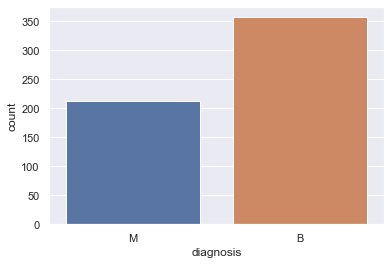

In [9]:
sns.countplot('diagnosis', data=data)

In [10]:
data.drop('id', axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

## Relationship analysis

### Correlation

In [13]:
correlation = data.corr()

<AxesSubplot:>

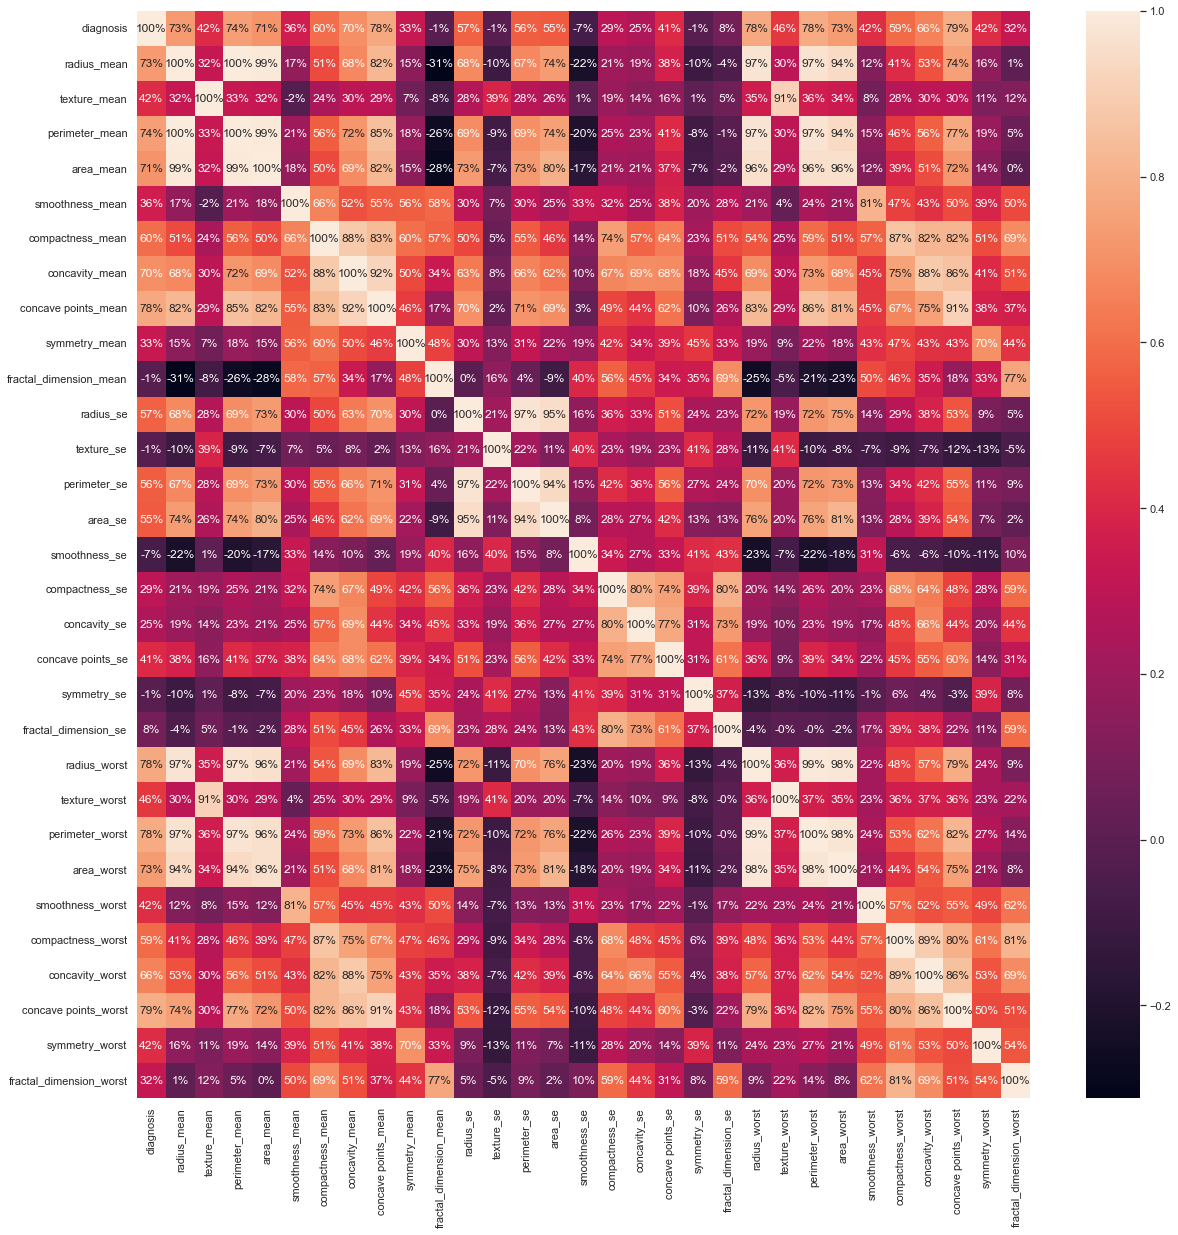

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,
           fmt='.0%', annot=True)

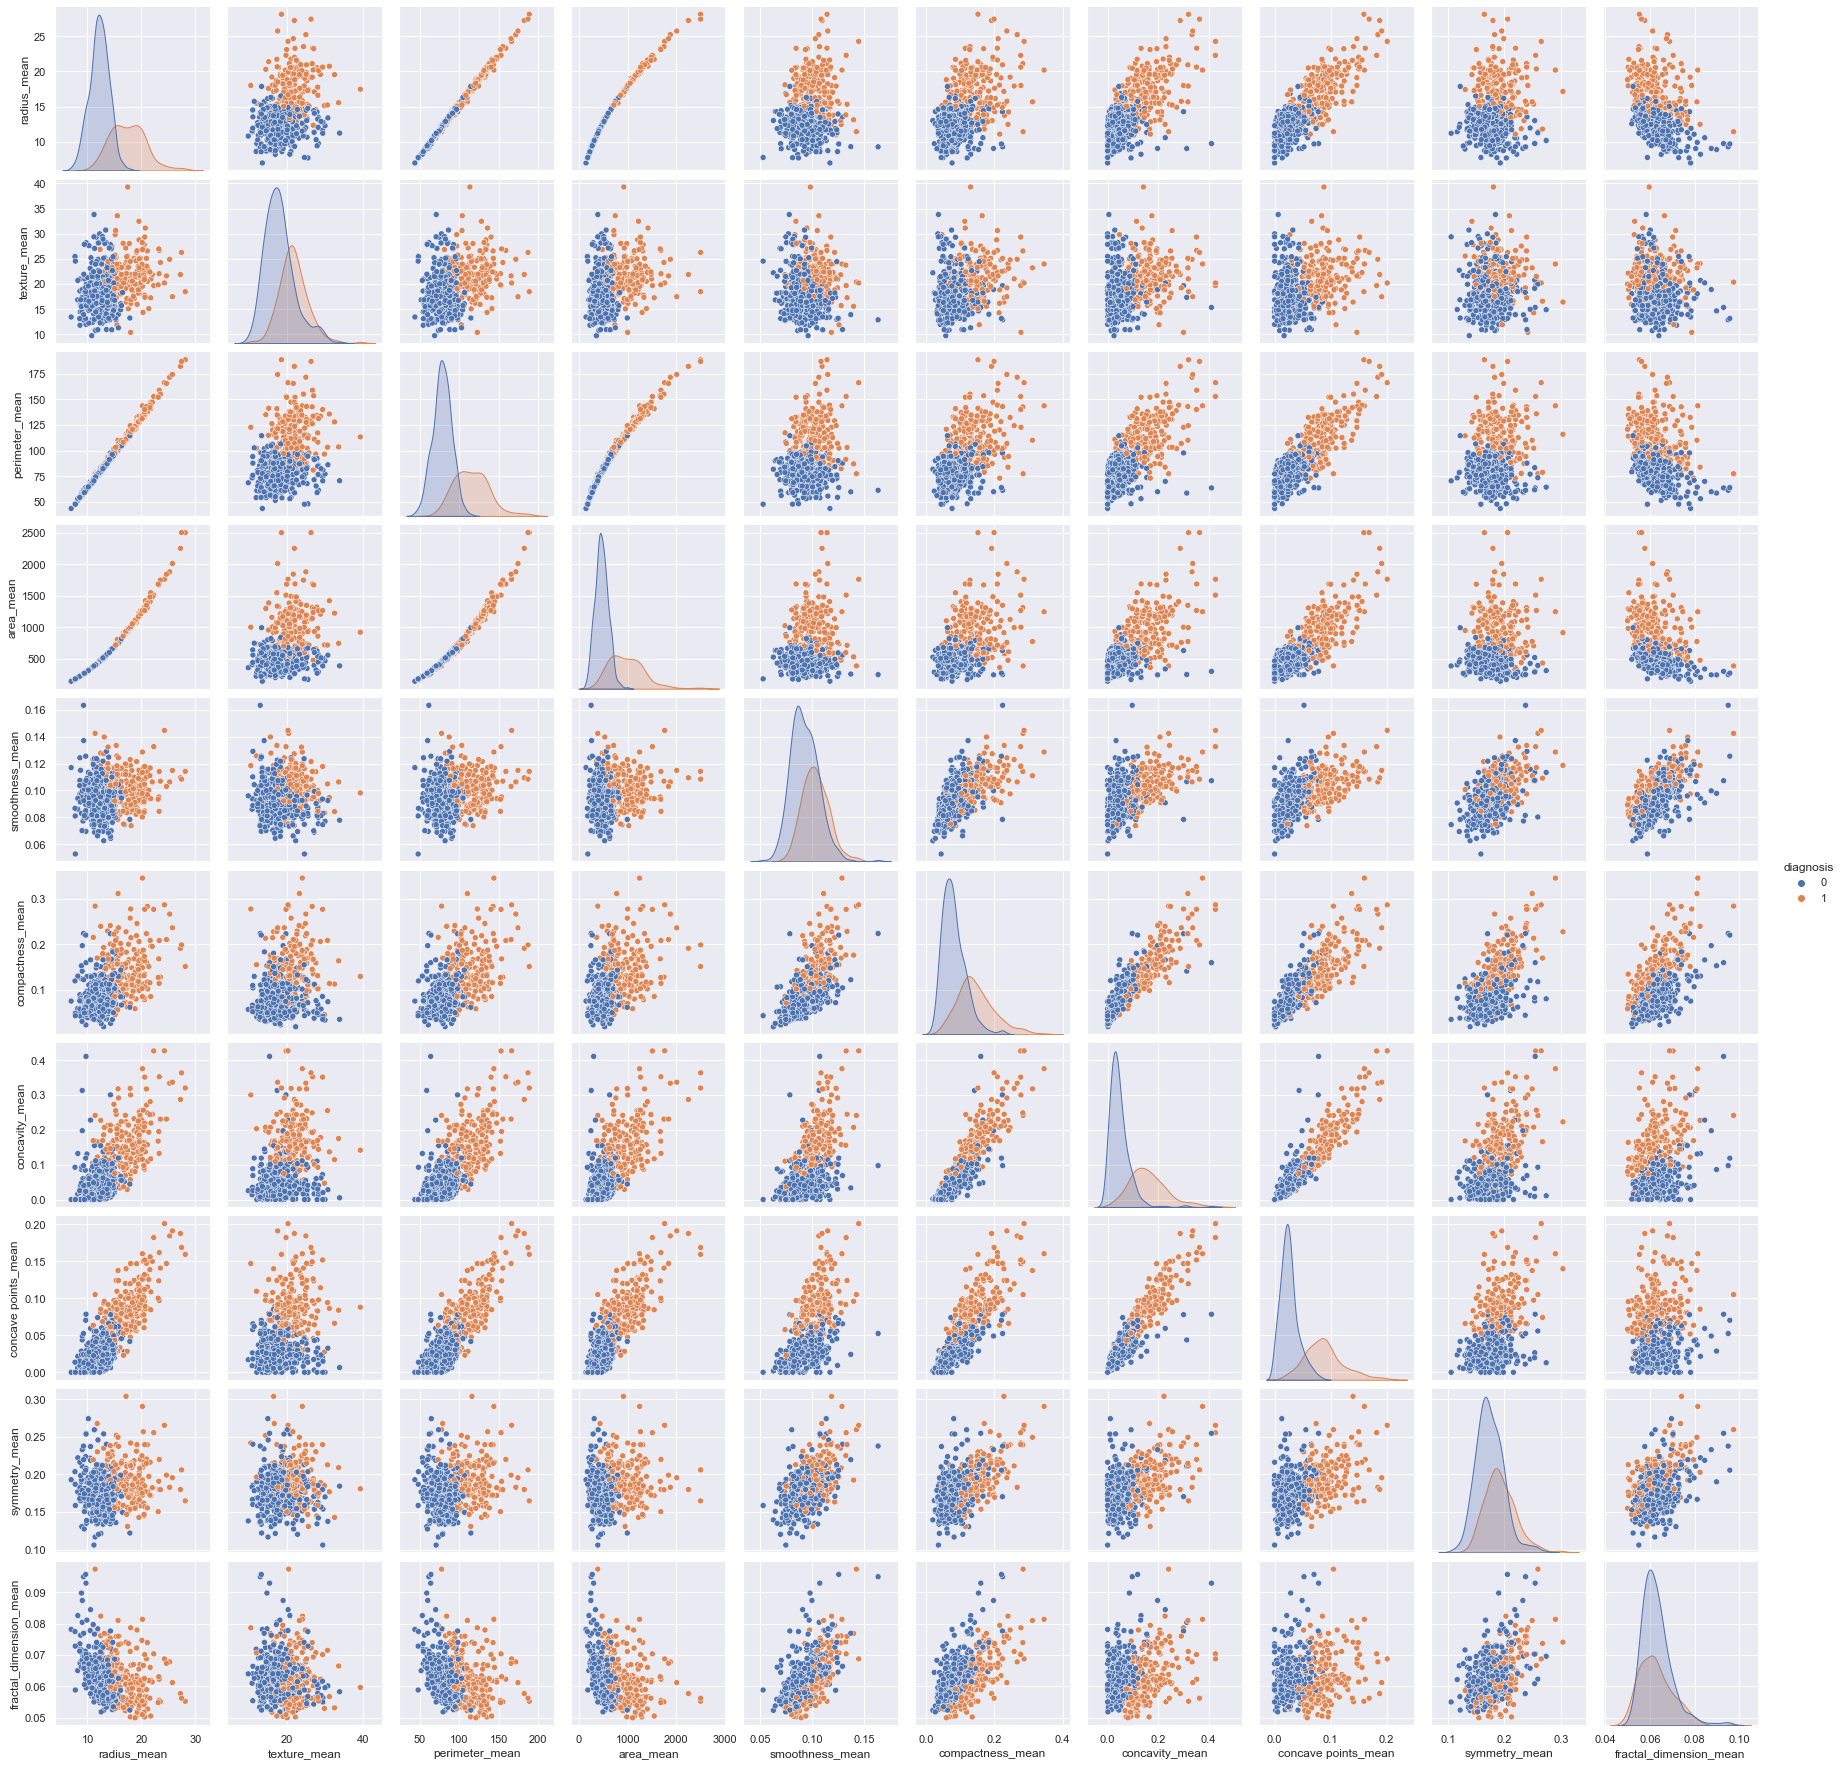

In [15]:
cols = ['diagnosis', 
       'radius_mean',
       'texture_mean',
       'perimeter_mean',
        'area_mean',
       'smoothness_mean',
       'compactness_mean',
       'concavity_mean',
        'concave points_mean',
       'symmetry_mean',
       'fractal_dimension_mean']
sns.pairplot(data=data[cols], hue='diagnosis')

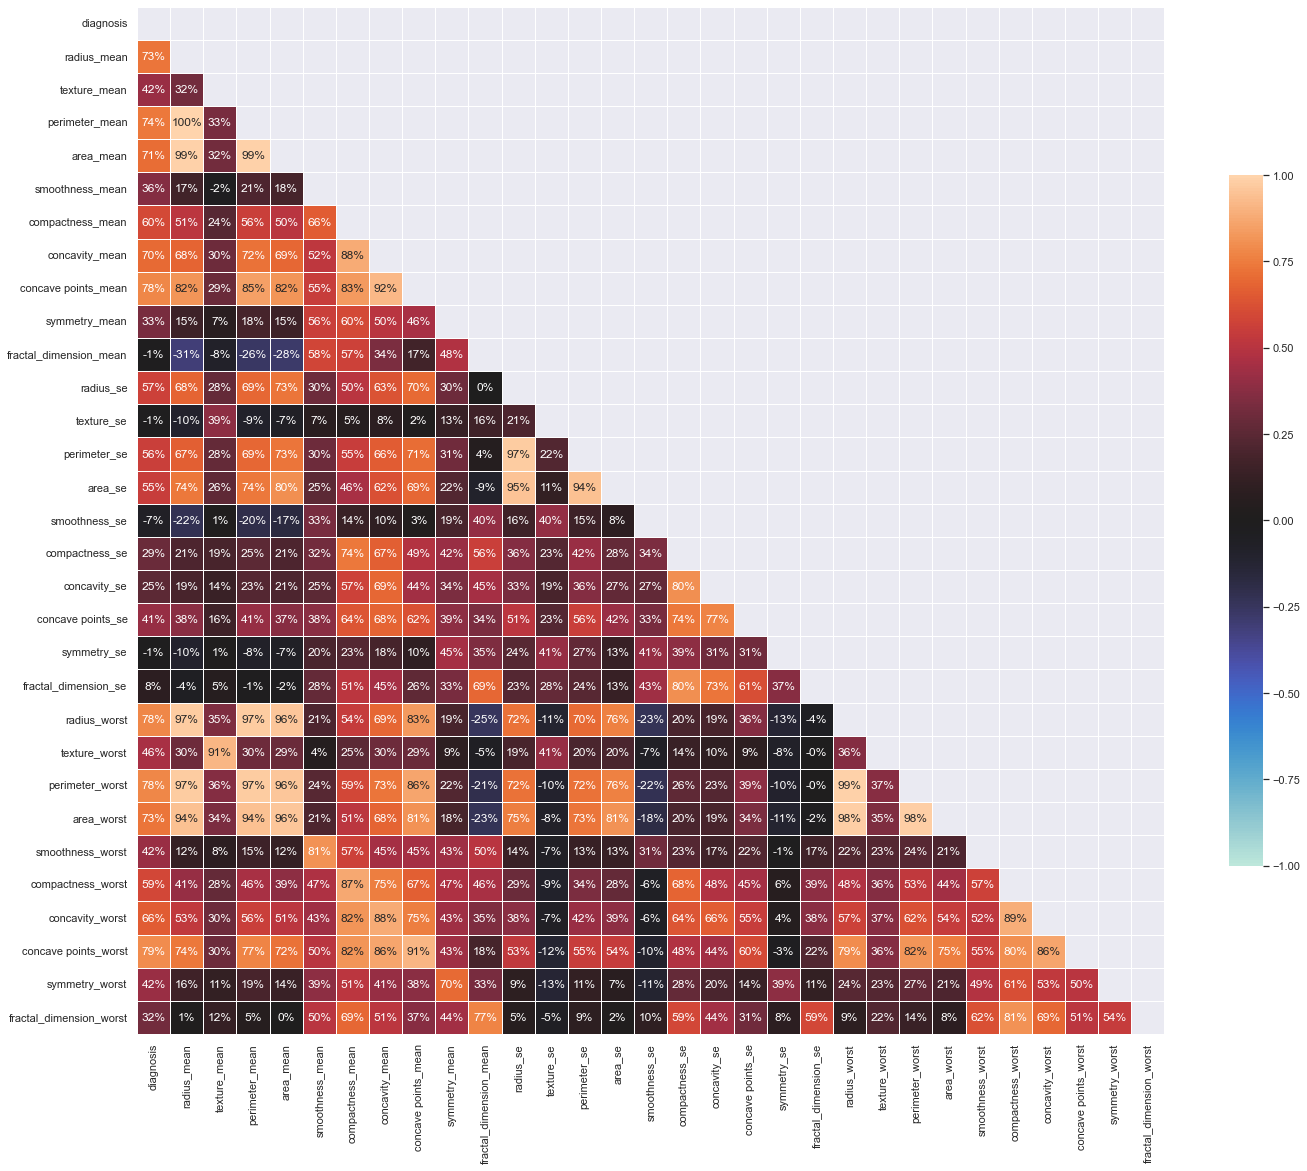

In [16]:
# Generate and visualize the correlation matrix
corr = data.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0,
           square=True, linewidth=.5, cbar_kws={"shrink": .5}, fmt='.0%', annot=True)

plt.tight_layout()

In [17]:
correlated_features = set()
correlation_matrix = data.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [18]:
len(correlated_features)

10

In [19]:
print(correlated_features)

{'perimeter_worst', 'area_se', 'radius_worst', 'texture_worst', 'concave points_worst', 'area_mean', 'perimeter_mean', 'area_worst', 'perimeter_se', 'concave points_mean'}


In [20]:
data.drop(labels=correlated_features, axis=1, inplace=True)

In [21]:
# removing correlations by eye, turns out it worsened the results
'''cols = ['radius_worst',
       'texture_worst',
       'perimeter_worst',
        'area_worst',
       'smoothness_worst',
       'compactness_worst',
       'concavity_worst',
        'concave points_worst',
       'symmetry_worst',
       'fractal_dimension_worst']
data = data.drop(cols, axis=1)

cols = ['perimeter_mean',
       'perimeter_se',
       'area_mean',
       'area_se']
data = data.drop(cols, axis=1)

cols = ['concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se']
data = data.drop(cols, axis=1)

data.columns'''

"cols = ['radius_worst',\n       'texture_worst',\n       'perimeter_worst',\n        'area_worst',\n       'smoothness_worst',\n       'compactness_worst',\n       'concavity_worst',\n        'concave points_worst',\n       'symmetry_worst',\n       'fractal_dimension_worst']\ndata = data.drop(cols, axis=1)\n\ncols = ['perimeter_mean',\n       'perimeter_se',\n       'area_mean',\n       'area_se']\ndata = data.drop(cols, axis=1)\n\ncols = ['concavity_mean',\n       'concavity_se',\n       'concave points_mean',\n       'concave points_se']\ndata = data.drop(cols, axis=1)\n\ndata.columns"

In [22]:
data.shape

(569, 21)

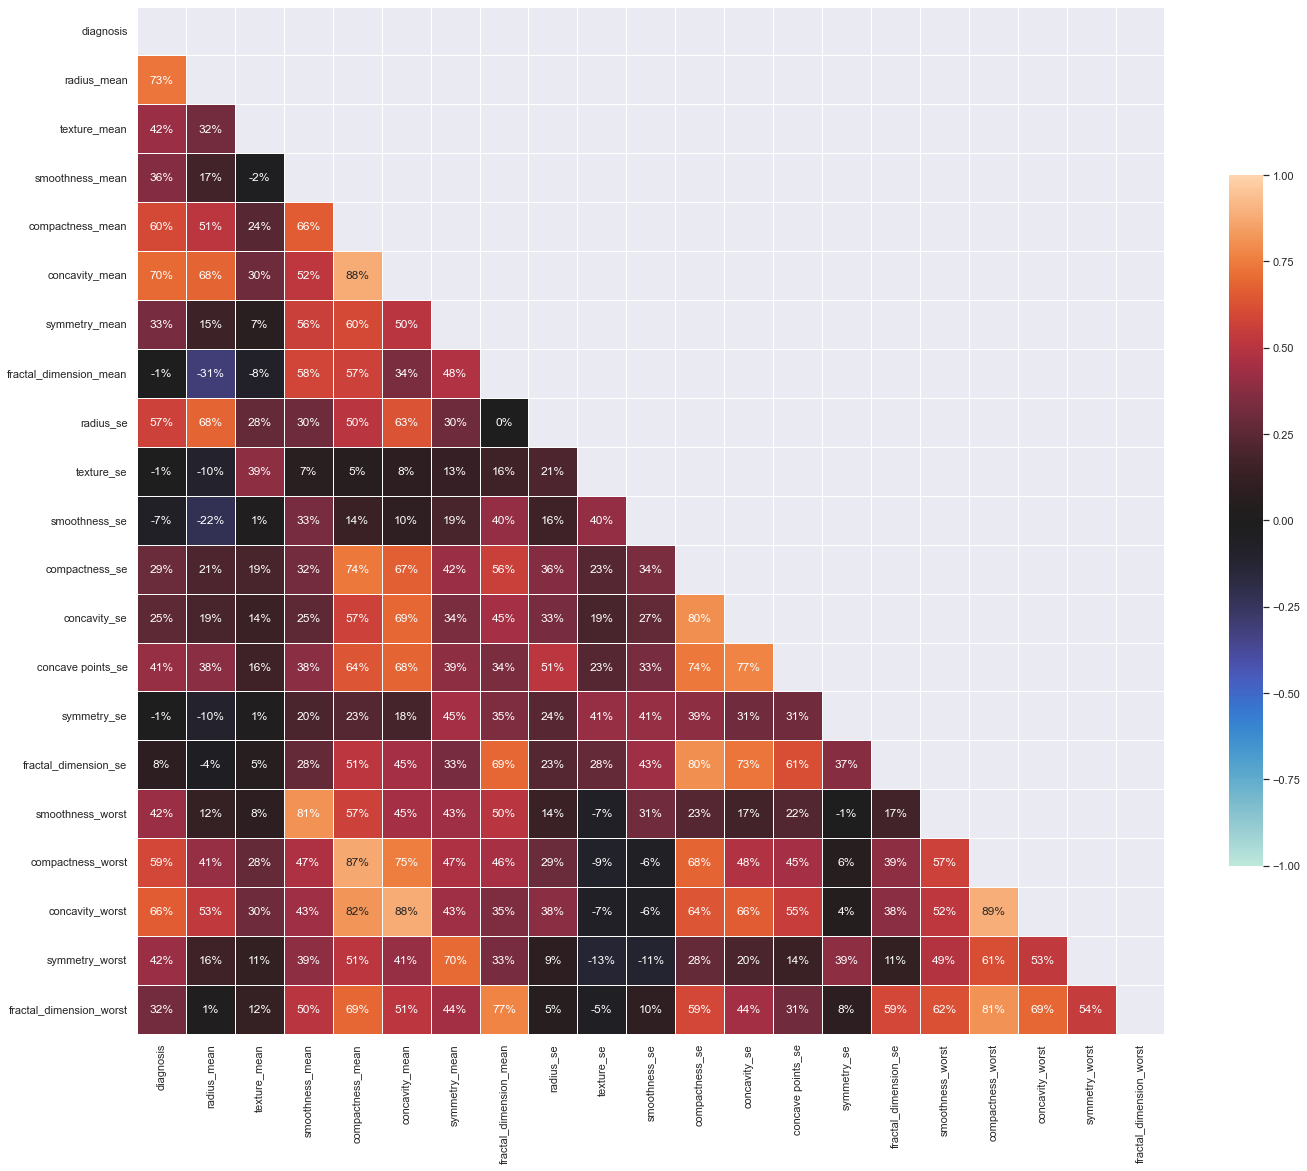

In [23]:
# Again draw the heatmap to check for correlations

# Generate and visualize the correlation matrix
corr = data.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0,
           square=True, linewidth=.5, cbar_kws={"shrink": .5}, fmt='.0%', annot=True)

plt.tight_layout()

There is no more big correlations that would slow down the calculationg process.

## Separating data into inputs and outputs

In [24]:
X = data.drop(['diagnosis'], axis=1)
Y = data['diagnosis']

print(X)
print(Y)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0           0.30010         0.2419                 0.07871     1.0950   
1           0.08690      

### Splitting data into train (70%) and test (30%) 

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train=ss.fit_transform(X_train)
# don't relearn informations from the testing data, but use what you've learned
# through the train data
X_test=ss.transform(X_test)

# Models and performance analysis

## Logistic Regression

In [27]:
logReg = LogisticRegression(random_state=0)

modelLR = logReg.fit(X_train, Y_train)
predictionLR = modelLR.predict(X_test)

In [28]:
cmLR = confusion_matrix(Y_test, predictionLR)
cmLR

array([[112,   3],
       [  2,  54]], dtype=int64)

<AxesSubplot:>

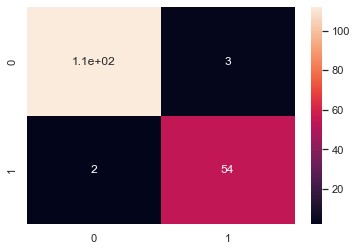

In [29]:
sns.heatmap(cmLR,annot=True)

In [30]:
print("Training accuracy: ", accuracy_score(Y_train, modelLR.predict(X_train)))
print("Accuracy score function: ",accuracy_score(Y_test, predictionLR))
print("Classification report\n", classification_report(Y_test, predictionLR))

Training accuracy:  0.9824120603015075
Accuracy score function:  0.9707602339181286
Classification report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       115
           1       0.95      0.96      0.96        56

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Decision Tree

In [31]:
decTree = DecisionTreeClassifier(criterion='entropy', random_state=0)

modelDT = decTree.fit(X_train, Y_train)
predictionDT = modelDT.predict(X_test)

In [32]:
cmDT = confusion_matrix(Y_test, predictionDT)
cmDT

array([[110,   5],
       [  4,  52]], dtype=int64)

<AxesSubplot:>

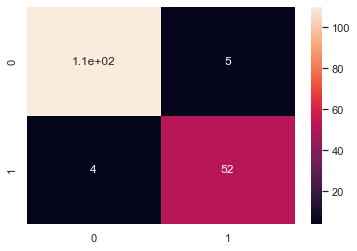

In [33]:
sns.heatmap(cmDT,annot=True)

In [34]:
print("Training accuracy: ", accuracy_score(Y_train, modelDT.predict(X_train)))
print("Accuracy score function: ",accuracy_score(Y_test, predictionDT))
print("Classification report\n", classification_report(Y_test, predictionDT))

Training accuracy:  1.0
Accuracy score function:  0.9473684210526315
Classification report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       115
           1       0.91      0.93      0.92        56

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



## Random Forest

In [35]:
randForest = RandomForestClassifier(criterion='entropy',  random_state=0)

modelRF = randForest.fit(X_train,Y_train)
predictionRF = modelRF.predict(X_test)

In [36]:
cmRF = confusion_matrix(Y_test, predictionRF)
cmRF

array([[112,   3],
       [  2,  54]], dtype=int64)

<AxesSubplot:>

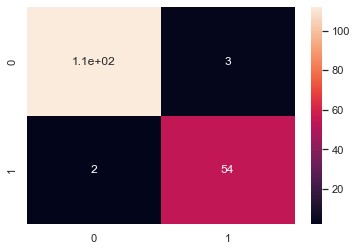

In [37]:
sns.heatmap(cmRF,annot=True)

In [38]:
print("Training accuracy: ", accuracy_score(Y_train, modelRF.predict(X_train)))
print("Accuracy score function: ",accuracy_score(Y_test, predictionRF))
print("Classification report\n", classification_report(Y_test, predictionRF))

Training accuracy:  1.0
Accuracy score function:  0.9707602339181286
Classification report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       115
           1       0.95      0.96      0.96        56

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

